**Initial Data Exploration**

In [98]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder

In [99]:
# Loading the dataset into pandas dataframe
df = pd.read_csv("./PS_20174392719_1491204439457_log.csv")

In [100]:
# Display the first 10 rows of the dataframe
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [101]:
# Display the shape of the dataframe
df.shape

(6362620, 11)

In [102]:
# Display data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [103]:
# Summary statistics for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [104]:
# Display the column names
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [105]:
# Check for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**Univariate Analysis - Numerical Features**

Plot Histograms for Numerical Features

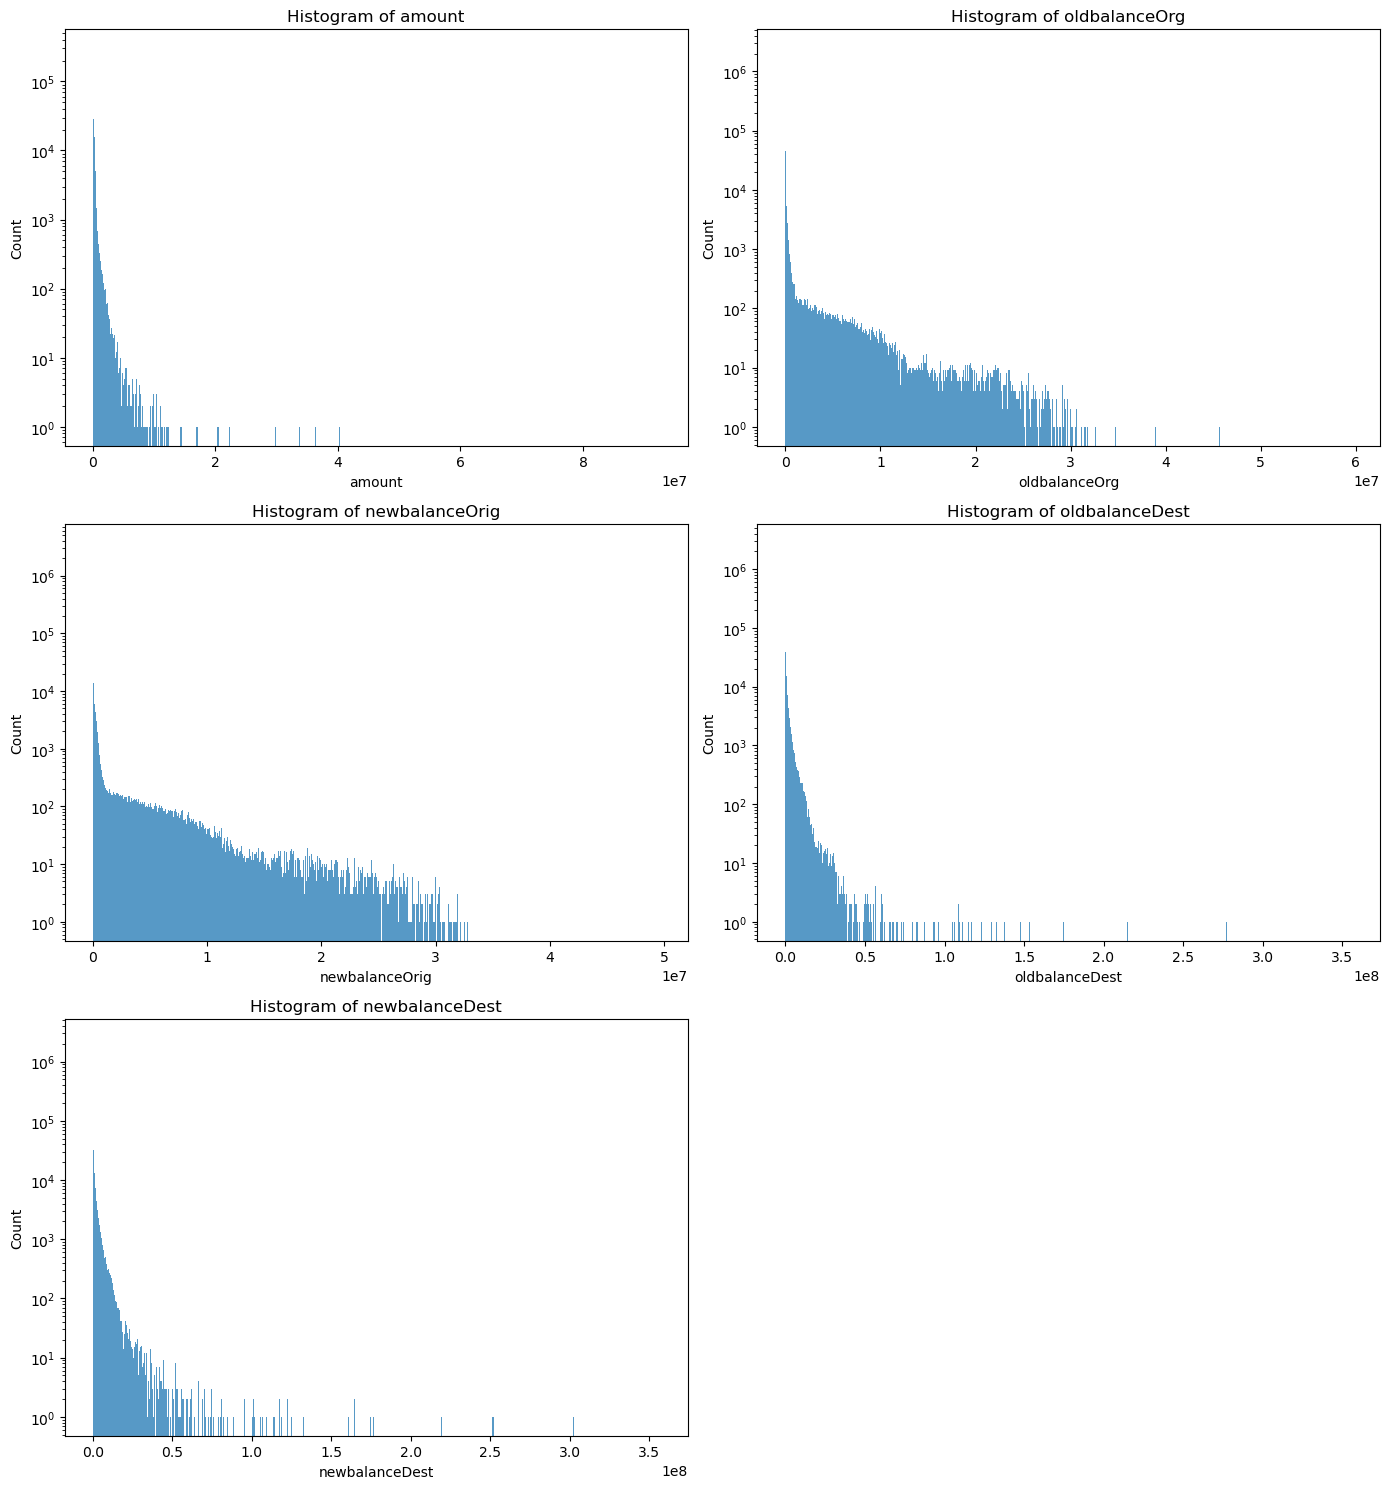

In [9]:
# List of numerical columns
num_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Calculate the number of rows needed for subplots (2 plots per row)
num_rows = (len(num_columns) + 1) // 2

# Create a figure with subplots
plt.figure(figsize=(14, num_rows * 5))  

# Loop through the list of numerical columns to create subplots
for index, col in enumerate(num_columns):
    plt.subplot(num_rows, 2, index + 1)  # Create subplot for each column
    sns.histplot(df[col], kde=False).set_yscale('log')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()  # Adjust subplots to fit into the figure area nicely
plt.show()

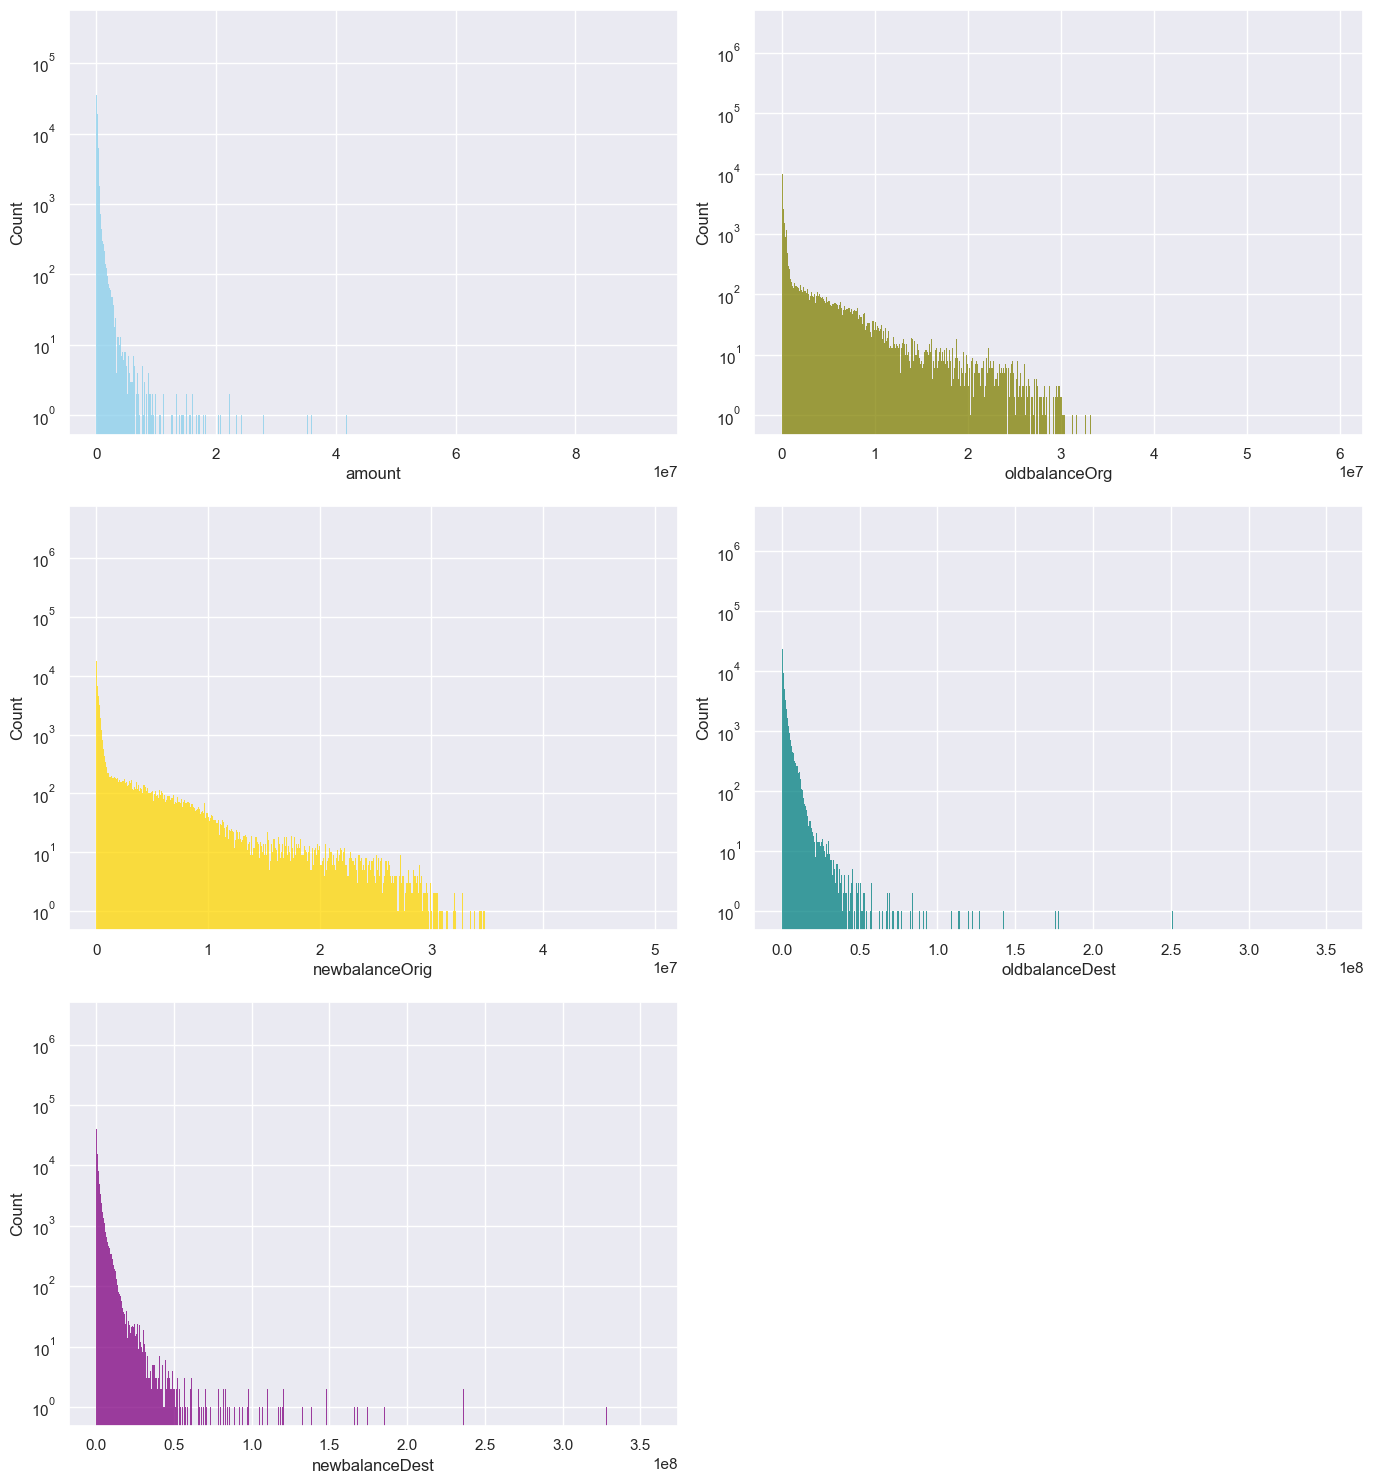

In [10]:
# num_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Set the aesthetic style of the plots
sns.set_theme(style="darkgrid")

# Create a figure with subplots in a 3x2 layout
fig, axs = plt.subplots(3, 2, figsize=(14, 15)) 

# Plot histograms with logarithmic y-scale
sns.histplot(df['amount'], color="skyblue", ax=axs[0, 0], log_scale=(False, True))
sns.histplot(df['oldbalanceOrg'], color="olive", ax=axs[0, 1], log_scale=(False, True))
sns.histplot(df['newbalanceOrig'], color="gold", ax=axs[1, 0], log_scale=(False, True))
sns.histplot(df['oldbalanceDest'], color="teal", ax=axs[1, 1], log_scale=(False, True))
sns.histplot(df['newbalanceDest'], color="purple", ax=axs[2, 0], log_scale=(False, True))
# Adjust layout to prevent overlap and hide empty subplot
plt.tight_layout()
axs[2, 1].axis('off')  # Turn off the unused subplot

# Display the plots
plt.show()

Plot Histogram for 'amount' feature

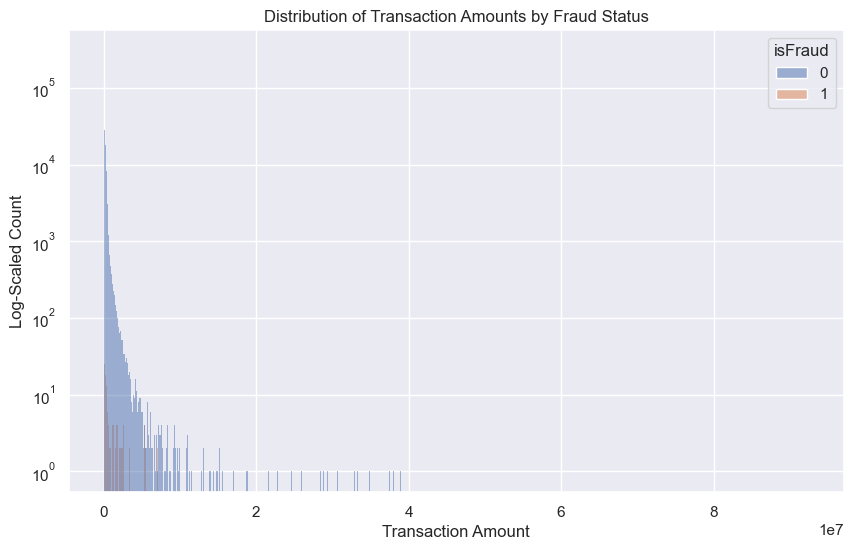

In [11]:
# Set the aesthetic style of the plots
sns.set_theme(style="darkgrid")
# Plot histograms with logarithmic y-scale and use 'isFraud' as hue to differentiate data
plt.figure(figsize=(10, 6))  # Adjust the size for better visibility
sns.histplot(df, x='amount', hue='isFraud', color="skyblue", log_scale=(False, True))

# Setting the title and labels for clarity
plt.title('Distribution of Transaction Amounts by Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Log-Scaled Count')
plt.show()

In [12]:
df_filtered = df[(df['amount'] > -1) & (df['amount'] < 100000)]

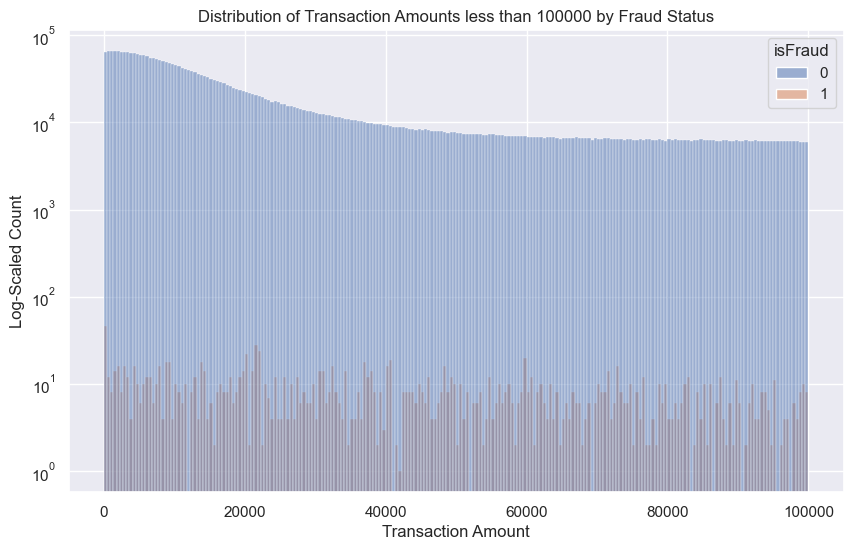

In [13]:
# Set the aesthetic style of the plots
sns.set_theme(style="darkgrid")
# Plot histograms with logarithmic y-scale and use 'isFraud' as hue to differentiate data
plt.figure(figsize=(10, 6))  # Adjust the size for better visibility
sns.histplot(df_filtered, x='amount', hue='isFraud', color="skyblue", log_scale=(False, True))

# Setting the title and labels for clarity
plt.title('Distribution of Transaction Amounts less than 100000 by Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Log-Scaled Count')
plt.show()

**Univariate Analysis - Categorical Features**

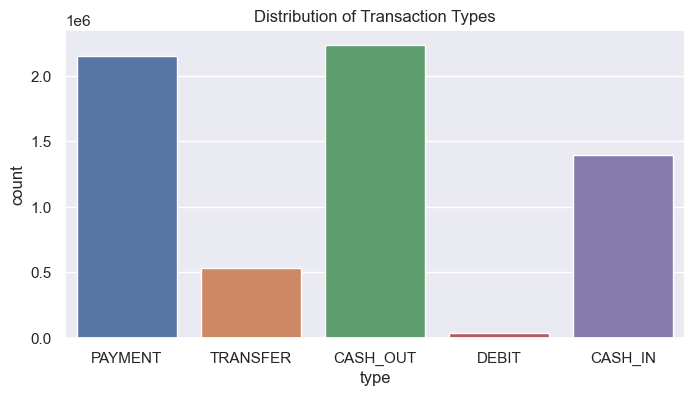

In [14]:
# Count plot for 'type' of transaction
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='type')
plt.title('Distribution of Transaction Types')
plt.show()

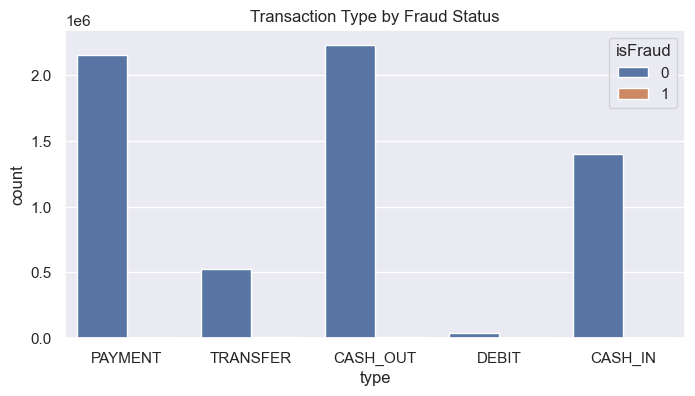

In [15]:
# Bar plot to see the relationship between 'type' and 'isFraud'
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='type', hue='isFraud')
plt.title('Transaction Type by Fraud Status')
plt.show()

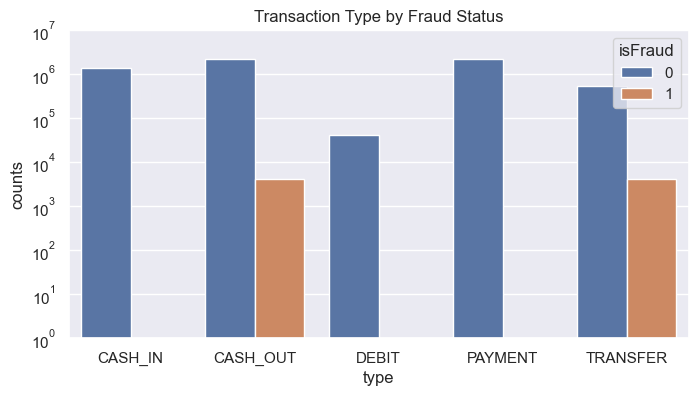

In [16]:
# Transaction Type by Fraud Status
import matplotlib.pyplot as plt
# Calculate the counts
count_data = df.groupby(['type', 'isFraud']).size().reset_index(name='counts')
# Create the plot with seaborn's barplot
plt.figure(figsize=(8, 4))
barplot = sns.barplot(data=count_data, x='type', y='counts', hue='isFraud').set_yscale('log')
# Set the title
plt.title('Transaction Type by Fraud Status')
# Set the y-axis to a log scale
#plt.yscale('log')
plt.ylim(1e0, 1e7)

plt.show()

Count Plots for Categorical Features

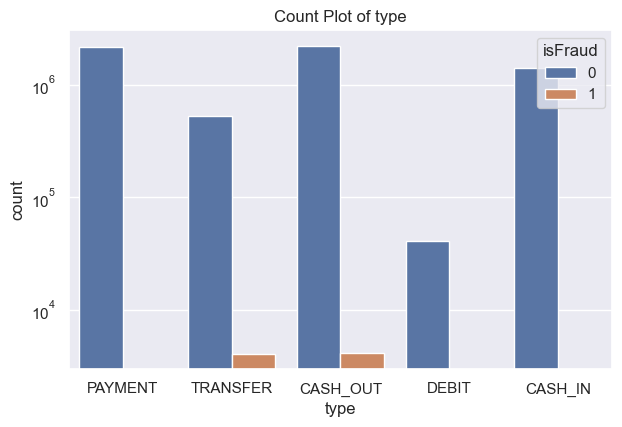

In [17]:
# List of categorical columns
cat_columns = ['type']

plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data = df, x=df[col], hue='isFraud').set_yscale('log')
    #plt.yscale('log')
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

feature Engineering - new features
- isNew: if oldbalanceOrg == 0
- isClosed: newbalanceOrg == 0
- isSeen: if uniqe count of nameDest > 1
- More columns????????????
df['nameDest'].nunique()
df['nameOrig'].nunique()
df['calAmount'] =   df['oldbalanceOrg'] - df['newbalanceOrig']
df.loc[:,['calAmount', 'amount']].head()

**Feature Engineering**

In [106]:
# Feature Engineering: 'isNew' column
df['isNew'] = (df['oldbalanceOrg'] == 0)

In [107]:
# Feature Engineering: 'isClosed' column
df['isClosed'] = (df['newbalanceOrig'] == 0)

In [108]:
# Feature Engineering: 'isSeen' column

# Count occurrences of each 'nameDest'
dest_counts = df['nameDest'].value_counts()

# Map the counts back to the original DataFrame to check if the count is greater than 1
df['isSeen'] = df['nameDest'].map(dest_counts) > 1


In [109]:
# Feature Engineering:
# sudden increases in transaction frequency can be a red flag, indicating potential fraud or money laundering activities
df['transaction_count_orig'] = df.groupby('nameOrig')['nameOrig'].transform('count')
df['transaction_count_dest'] = df.groupby('nameDest')['nameDest'].transform('count')

In [110]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isNew,isClosed,isSeen,transaction_count_orig,transaction_count_dest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,False,1,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,False,1,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,True,True,1,44
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,True,True,1,41
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,False,1,1


**Label Encoding and One-Hot Encoding**

In [111]:
print(df.dtypes)

step                        int64
type                       object
amount                    float64
nameOrig                   object
oldbalanceOrg             float64
newbalanceOrig            float64
nameDest                   object
oldbalanceDest            float64
newbalanceDest            float64
isFraud                     int64
isFlaggedFraud              int64
isNew                        bool
isClosed                     bool
isSeen                       bool
transaction_count_orig      int64
transaction_count_dest      int64
dtype: object


In [112]:
# Applying one-hot encoding for 'type' column
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [114]:
df.shape

(6362620, 19)

In [115]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isNew,isClosed,isSeen,transaction_count_orig,transaction_count_dest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,False,1,1,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,False,1,1,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,True,True,1,44,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,True,True,1,41,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,False,1,1,False,False,True,False


In [33]:
df.corr()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isNew,isSeen,isClosed,transaction_count_orig,transaction_count_dest,type_0
step,1.000000,0.022373,NaN,-0.010058,-0.010299,NaN,0.027665,0.025888,0.031578,0.003277,-0.009141,-0.048643,0.005390,-0.000830,-0.336167,NaN
amount,0.022373,1.000000,NaN,-0.002762,-0.007861,NaN,0.294137,0.459304,0.076688,0.012295,0.039323,0.192556,0.115566,0.000292,0.158413,NaN
nameOrig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,-0.010058,-0.002762,NaN,1.000000,0.998803,NaN,0.066243,0.042029,0.010154,0.003835,-0.202825,0.192468,-0.323722,-0.000340,0.142752,NaN
newbalanceOrig,-0.010299,-0.007861,NaN,0.998803,1.000000,NaN,0.067812,0.041837,-0.008148,0.003776,-0.205172,0.196875,-0.334857,-0.000343,0.145336,NaN
nameDest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,0.027665,0.294137,NaN,0.066243,0.067812,NaN,1.000000,0.976569,-0.005885,-0.000513,0.074957,0.238932,0.041383,0.000351,0.378800,NaN
newbalanceDest,0.025888,0.459304,NaN,0.042029,0.041837,NaN,0.976569,1.000000,0.000535,-0.000529,0.089049,0.245111,0.079761,0.000430,0.375987,NaN
isFraud,0.031578,0.076688,NaN,0.010154,-0.008148,NaN,-0.005885,0.000535,1.000000,0.044109,-0.024874,0.002265,0.029984,0.000316,-0.008982,NaN
isFlaggedFraud,0.003277,0.012295,NaN,0.003835,0.003776,NaN,-0.000513,-0.000529,0.044109,1.000000,-0.001114,-0.001721,-0.001816,-0.000086,-0.001240,NaN


In [116]:
df.isnull().sum()

step                      0
amount                    0
nameOrig                  0
oldbalanceOrg             0
newbalanceOrig            0
nameDest                  0
oldbalanceDest            0
newbalanceDest            0
isFraud                   0
isFlaggedFraud            0
isNew                     0
isClosed                  0
isSeen                    0
transaction_count_orig    0
transaction_count_dest    0
type_CASH_OUT             0
type_DEBIT                0
type_PAYMENT              0
type_TRANSFER             0
dtype: int64

In [34]:
correlation_matrix = df.corr()

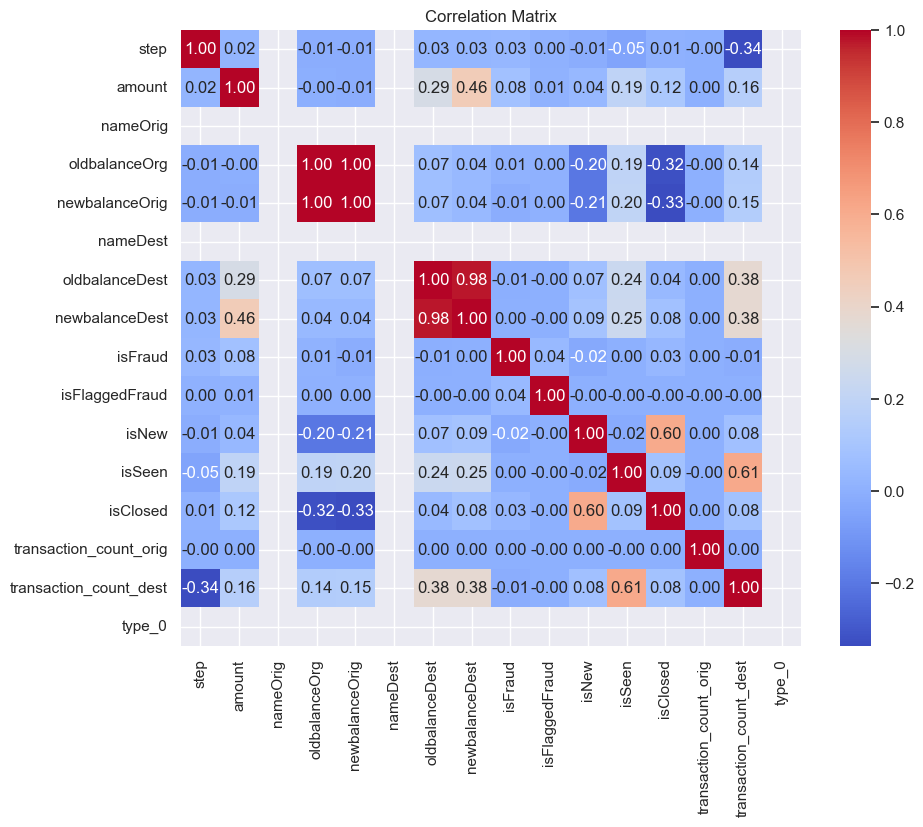

In [35]:
plt.figure(figsize=(10, 8))  # Adjust the size of the figure as necessary
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Outliers

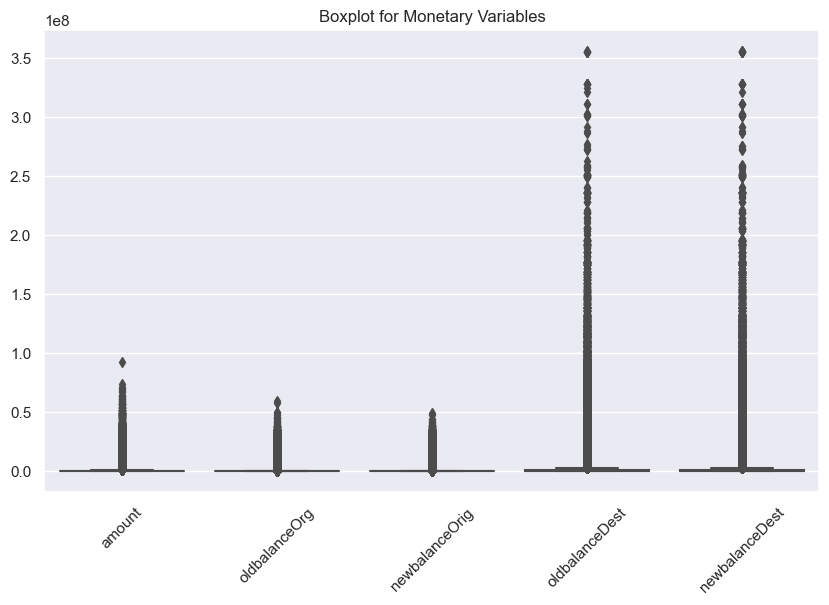

In [36]:
# Visualizing outliers with boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
plt.title('Boxplot for Monetary Variables')
plt.xticks(rotation=45)
plt.show()

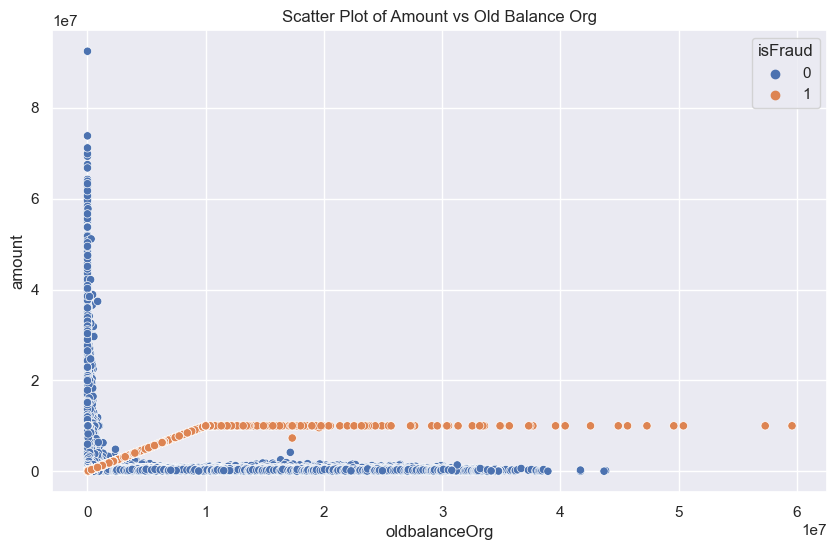

In [37]:
# Scatter plot for examining relationships and outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='amount', hue='isFraud', data=df)
plt.title('Scatter Plot of Amount vs Old Balance Org')
plt.show()

Creating velocity features based on past transactional behavior 

In [38]:
df['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

<Axes: xlabel='step', ylabel='Count'>

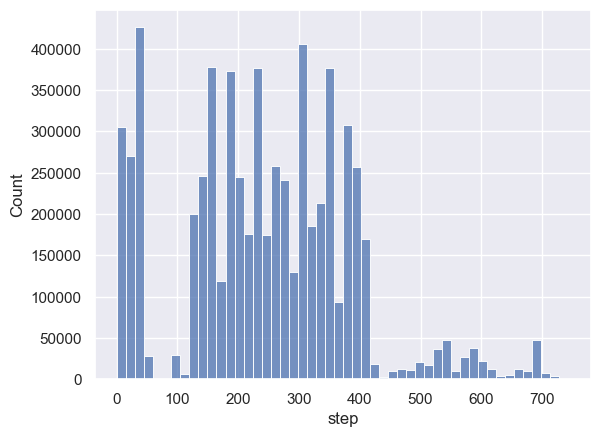

In [39]:
sns.histplot(data=df, x='step', bins=50)

In [40]:
df_100 = df.sample(n=100, random_state=42)
df_100

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isNew,isSeen,isClosed,transaction_count_orig,transaction_count_dest,type_0
3737323,278,330218.42,NaN,20866.00,351084.42,NaN,452419.57,122201.15,0,0,False,True,False,1,4,True
264914,15,11647.08,NaN,30370.00,18722.92,NaN,0.00,0.00,0,0,False,False,False,1,1,True
85647,10,152264.21,NaN,106589.00,258853.21,NaN,201303.01,49038.80,0,0,False,True,False,1,25,True
5899326,403,1551760.63,NaN,0.00,0.00,NaN,3198359.45,4750120.08,0,0,True,True,True,1,16,True
2544263,206,78172.30,NaN,2921331.58,2999503.88,NaN,415821.90,337649.60,0,0,False,True,False,1,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880535,403,7457.89,NaN,0.00,0.00,NaN,0.00,0.00,0,0,True,False,True,1,1,True
4060469,300,2262.52,NaN,49271.00,47008.48,NaN,124780.00,127042.52,0,0,False,True,False,1,6,True
6175471,564,67418.91,NaN,52181.00,119599.91,NaN,1659195.46,1591776.55,0,0,False,True,False,1,9,True
3356826,254,9414.76,NaN,5839.90,0.00,NaN,0.00,0.00,0,0,False,False,True,1,1,True


In [142]:

# Convert 'step' to datetime and set it as the DataFrame's index
df['date'] = pd.to_datetime(df['step'].apply(lambda x: pd.Timestamp('2020-01-01') + pd.Timedelta(hours=x)))
df.set_index('date', inplace=True)

In [143]:
df.sample(10)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isNew,isClosed,isSeen,transaction_count_orig,transaction_count_dest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
date,,,,,,,,,,,,,,,,,,,
2020-01-06 19:00:00,139,20999.72,C566509968,0.00,0.00,C655785785,433464.12,454463.84,0,0,True,True,True,1,18,True,False,False,False
2020-01-14 10:00:00,322,102095.68,C1768310607,1789598.75,1891694.43,C1167066573,1197647.46,1095551.78,0,0,False,False,True,1,7,False,False,False,False
2020-01-17 21:00:00,405,2988.11,C1088510127,876.00,0.00,M94311103,0.00,0.00,0,0,False,True,False,1,1,False,False,True,False
2020-01-11 12:00:00,252,126772.80,C1671213445,97678.00,224450.80,C263880637,463840.71,337067.91,0,0,False,False,True,1,15,False,False,False,False
2020-01-17 18:00:00,402,148085.22,C112123038,29745.00,0.00,C1436973686,0.00,148085.22,0,0,False,True,False,1,1,True,False,False,False
2020-01-08 14:00:00,182,30380.48,C214973280,718694.80,688314.32,C1743015764,2503711.07,2534091.55,0,0,False,False,True,1,23,True,False,False,False
2020-01-09 21:00:00,213,10219.66,C796157193,15295.00,5075.34,M1773481788,0.00,0.00,0,0,False,False,False,1,1,False,False,True,False
2020-01-02 13:00:00,37,11308.02,C1699903513,207758.61,196450.59,M508340703,0.00,0.00,0,0,False,False,False,1,1,False,False,True,False
2020-01-12 14:00:00,278,112444.82,C1448868029,103206.00,0.00,C1894632842,12523227.68,12635672.50,0,0,False,True,True,1,7,True,False,False,False


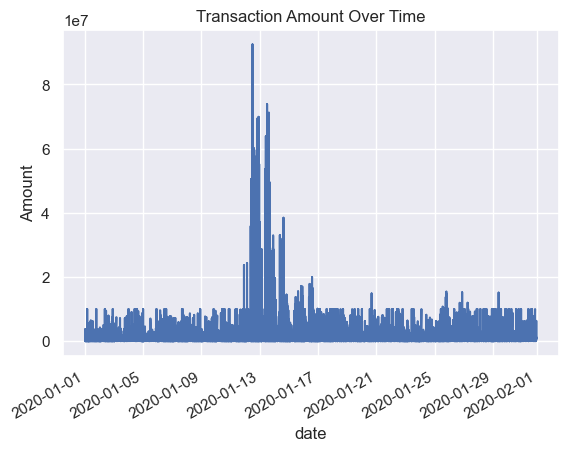

In [144]:
# Plotting some numeric column 'amount' over time
df['amount'].plot()
plt.title('Transaction Amount Over Time')
plt.ylabel('Amount')
plt.show()

Rolling average of the transaction amounts over the past 7 days

In [145]:
# Rolling average of the transaction amounts over the past 7 days
df['rolling_avg_7d'] = df['amount'].rolling(window='7D').mean()

In [146]:
df['rolling_avg_1d'] = df['amount'].rolling(window='1D').mean()

In [147]:
# Print the first few rows to see the new column with the 7-day rolling averages
print(df[['amount', 'rolling_avg_7d']].head(10))

                       amount  rolling_avg_7d
date                                         
2020-01-01 01:00:00   9839.64     9839.640000
2020-01-01 01:00:00   1864.28     5851.960000
2020-01-01 01:00:00    181.00     3961.640000
2020-01-01 01:00:00    181.00     3016.480000
2020-01-01 01:00:00  11668.14     4746.812000
2020-01-01 01:00:00   7817.71     5258.628333
2020-01-01 01:00:00   7107.77     5522.791429
2020-01-01 01:00:00   7861.64     5815.147500
2020-01-01 01:00:00   4024.36     5616.171111
2020-01-01 01:00:00   5337.77     5588.331000


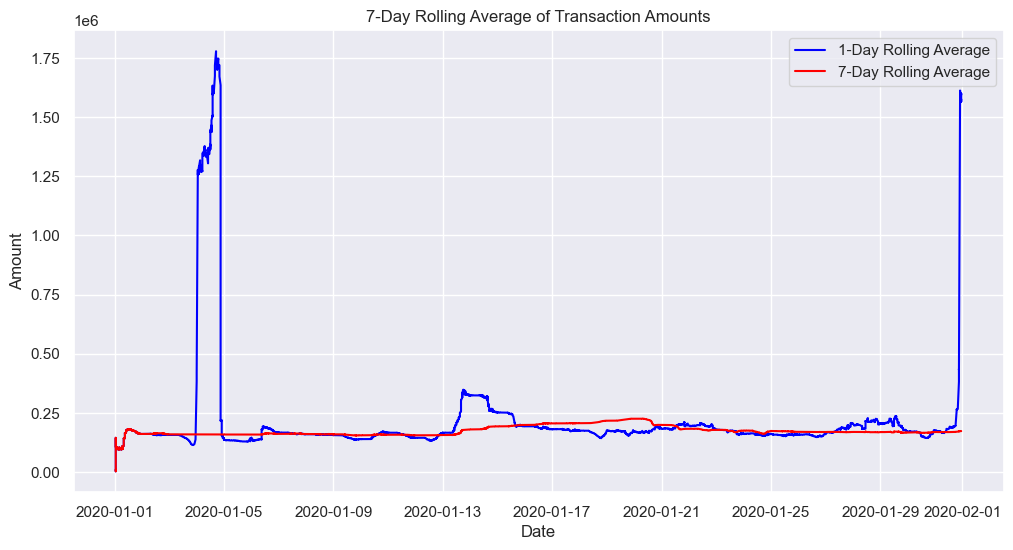

In [148]:
# Plot the original amounts and the rolling averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['rolling_avg_1d'], label='1-Day Rolling Average', color='blue')
plt.plot(df.index, df['rolling_avg_7d'], label='7-Day Rolling Average', color='red')
plt.title('7-Day Rolling Average of Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

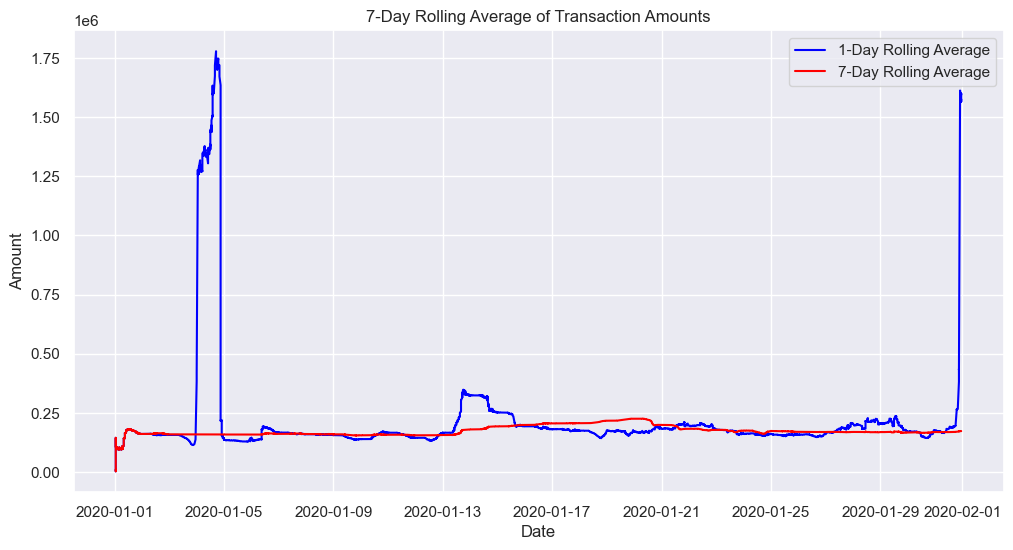

In [149]:
# Plot the original amounts and the rolling averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['rolling_avg_1d'], label='1-Day Rolling Average', color='blue')
plt.plot(df.index, df['rolling_avg_7d'], label='7-Day Rolling Average', color='red')
plt.title('7-Day Rolling Average of Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

Rolling count of transactions in the past 7 days

In [150]:
df['rolling_tx_count_7d'] = df['amount'].rolling(window='7D').count()

In [151]:
# Print the first few rows to check the new column with the 7-day rolling transaction count
print(df[['amount', 'rolling_tx_count_7d']].head(10))

                       amount  rolling_tx_count_7d
date                                              
2020-01-01 01:00:00   9839.64                  1.0
2020-01-01 01:00:00   1864.28                  2.0
2020-01-01 01:00:00    181.00                  3.0
2020-01-01 01:00:00    181.00                  4.0
2020-01-01 01:00:00  11668.14                  5.0
2020-01-01 01:00:00   7817.71                  6.0
2020-01-01 01:00:00   7107.77                  7.0
2020-01-01 01:00:00   7861.64                  8.0
2020-01-01 01:00:00   4024.36                  9.0
2020-01-01 01:00:00   5337.77                 10.0


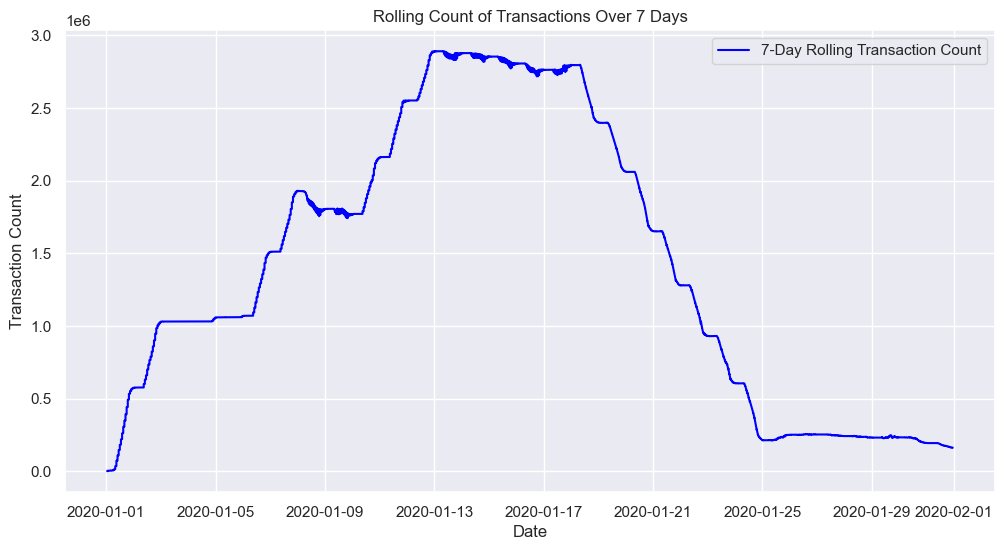

In [152]:
# Plot the rolling count of transactions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['rolling_tx_count_7d'], label='7-Day Rolling Transaction Count', color='blue')
plt.title('Rolling Count of Transactions Over 7 Days')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.legend()
plt.show()

Rolling sum of transaction amounts over the past 30 days

In [153]:
# Calculate the rolling sum of transaction amounts over the past 30 days
df['rolling_sum_30d'] = df['amount'].rolling(window='30D').sum()

In [154]:

# Print the first few rows to check the new column with the 30-day rolling sum of transaction amounts
print(df[['amount', 'rolling_sum_30d']].head(10))

                       amount  rolling_sum_30d
date                                          
2020-01-01 01:00:00   9839.64          9839.64
2020-01-01 01:00:00   1864.28         11703.92
2020-01-01 01:00:00    181.00         11884.92
2020-01-01 01:00:00    181.00         12065.92
2020-01-01 01:00:00  11668.14         23734.06
2020-01-01 01:00:00   7817.71         31551.77
2020-01-01 01:00:00   7107.77         38659.54
2020-01-01 01:00:00   7861.64         46521.18
2020-01-01 01:00:00   4024.36         50545.54
2020-01-01 01:00:00   5337.77         55883.31


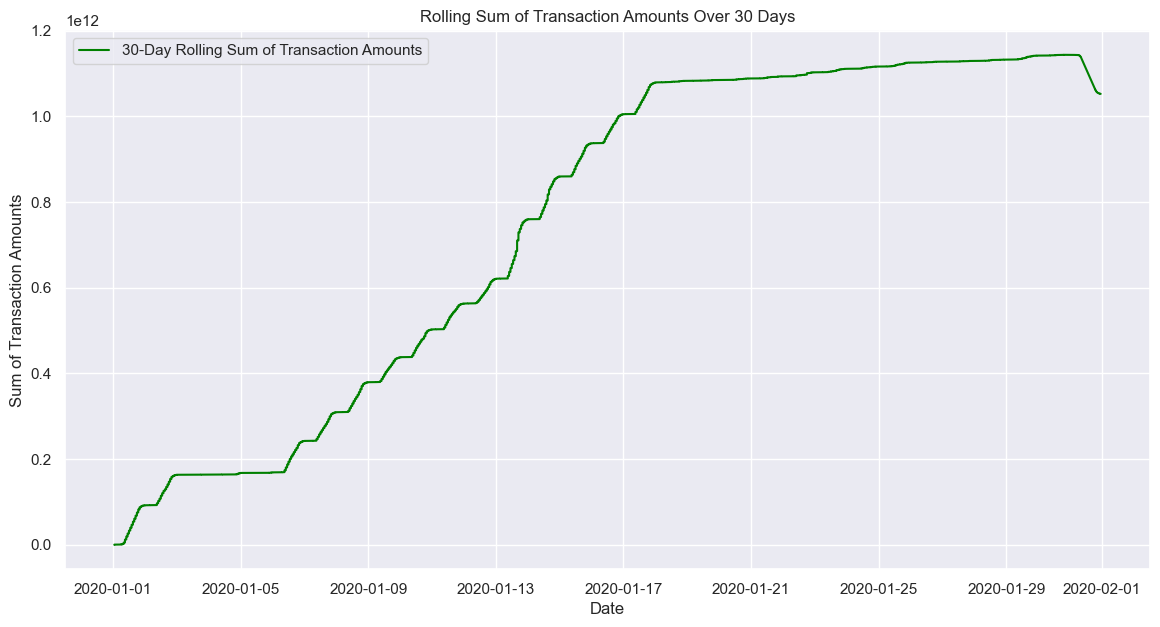

In [155]:
# Plot the rolling sum of transaction amounts
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['rolling_sum_30d'], label='30-Day Rolling Sum of Transaction Amounts', color='green')
plt.title('Rolling Sum of Transaction Amounts Over 30 Days')
plt.xlabel('Date')
plt.ylabel('Sum of Transaction Amounts')
plt.legend()
plt.show()

In [156]:
# Track the maximum or minimum transaction amounts over a specified time period to spot sudden spikes or drops in transaction values
# Rolling maximum of the transaction amounts over the past 7 days
df['rolling_max_7d'] = df['amount'].rolling(window='7D').max()

# Rolling minimum of the transaction amounts over the past 7 days
df['rolling_min_7d'] = df['amount'].rolling(window='7D').min()

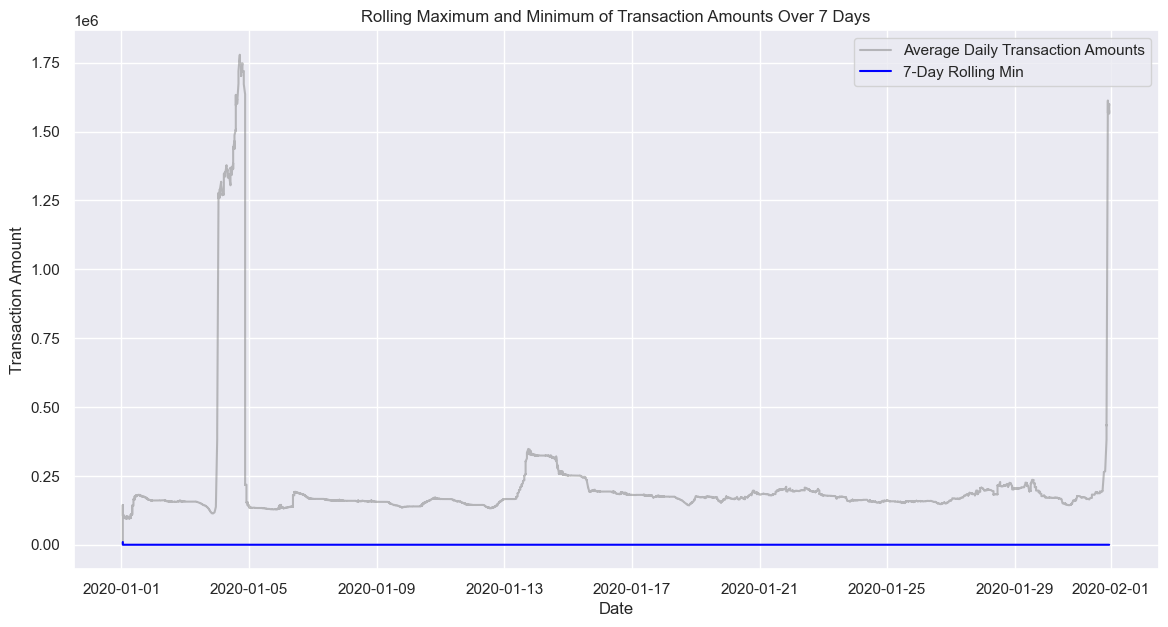

In [157]:
# Set up the figure and axis
plt.figure(figsize=(14, 7))
plt.title('Rolling Maximum and Minimum of Transaction Amounts Over 7 Days')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')

# Plot the original transaction amounts
plt.plot(df.index, df['rolling_avg_1d'], label='Average Daily Transaction Amounts', color='gray', alpha=0.5)

# Plot the rolling maximum and minimum
#plt.plot(df.index, df['rolling_max_7d'], label='7-Day Rolling Max', color='red')
plt.plot(df.index, df['rolling_min_7d'], label='7-Day Rolling Min', color='blue')

plt.legend()
plt.show()

Computing velocities by account and by date for 7 Days

In [68]:
# Convert 'step' to datetime and set it as the DataFrame's index
df['date'] = pd.to_datetime(df['step'].apply(lambda x: pd.Timestamp('2020-01-01') + pd.Timedelta(hours=x)))
df.set_index('date', inplace=True)

In [69]:
# Group by 'nameOrig' and calculate the 7-day rolling average of 'amount'
rolling_data = df.groupby('nameOrig')['amount'].rolling(window='7D').mean().reset_index()

# Reset index to flatten the DataFrame and make it easier to work with
rolling_data.rename(columns={'amount': 'rolling_avg_7d'}, inplace=True)

# Display the resulting DataFrame
print(rolling_data.head())




ValueError: need at least one array to concatenate

In [58]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,...,isClosed,transaction_count_orig,transaction_count_dest,type_0,rolling_avg_7d,rolling_avg_1d,rolling_tx_count_7d,rolling_sum_30d,rolling_max_7d,rolling_min_7d
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 01:00:00,1,9839.64,NaN,170136.0,160296.36,NaN,0.0,0.0,0,0,...,False,1,1,True,9839.640,9839.640,1.0,9839.64,9839.64,9839.64
2020-01-01 01:00:00,1,1864.28,NaN,21249.0,19384.72,NaN,0.0,0.0,0,0,...,False,1,1,True,5851.960,5851.960,2.0,11703.92,9839.64,1864.28
2020-01-01 01:00:00,1,181.00,NaN,181.0,0.00,NaN,0.0,0.0,1,0,...,True,1,44,True,3961.640,3961.640,3.0,11884.92,9839.64,181.00
2020-01-01 01:00:00,1,181.00,NaN,181.0,0.00,NaN,21182.0,0.0,1,0,...,True,1,41,True,3016.480,3016.480,4.0,12065.92,9839.64,181.00
2020-01-01 01:00:00,1,11668.14,NaN,41554.0,29885.86,NaN,0.0,0.0,0,0,...,False,1,1,True,4746.812,4746.812,5.0,23734.06,11668.14,181.00


In [61]:
# If 'date' was your DataFrame index, ensure it's included in the DataFrame before merging
df.reset_index(inplace=True)  # This will make 'date' a column if it was the index

# Merge the rolling average back to the original DataFrame
df = df.merge(rolling_data, on=['nameOrig', 'date'], how='left', suffixes=('', '_rolling_avg_7d'))

NameError: name 'rolling_data' is not defined

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['amount_rolling_avg_7d'], label='7-Day Rolling Average')
plt.title('7-Day Rolling Average Transaction Amount by Account')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

Compute 30 Days rolling average grouped by 'nameOrig'

In [159]:
# Convert 'step' to datetime and set it as the DataFrame's index
df['date'] = pd.to_datetime(df['step'].apply(lambda x: pd.Timestamp('2020-01-01') + pd.Timedelta(hours=x)))
df.set_index('date', inplace=True)

In [160]:
df.sample(10)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,...,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,rolling_avg_7d,rolling_avg_1d,rolling_tx_count_7d,rolling_sum_30d,rolling_max_7d,rolling_min_7d
date,,,,,,,,,,,,,,,,,,,,,
2020-01-29 20:00:00,692,47412.09,C766163721,956.00,0.00,C1431853345,0.00,47412.09,0,0,...,True,False,False,False,164971.253075,177133.727094,241300.0,1.141201e+12,15415938.31,0.00
2020-01-14 20:00:00,332,24621.25,C397386228,0.00,0.00,C277308857,552387.33,577008.58,0,0,...,True,False,False,False,192654.085338,264046.984569,2822879.0,8.484814e+11,92445516.64,0.00
2020-01-01 16:00:00,16,9607.68,C565401430,298983.00,289375.32,M829591064,0.00,0.00,0,0,...,False,False,True,False,175430.800140,175430.800140,322059.0,5.649907e+10,10000000.00,0.30
2020-01-25 13:00:00,589,4803.56,C1411743287,0.00,0.00,M1458511624,0.00,0.00,0,0,...,False,False,True,False,171884.529164,152922.804757,223273.0,1.119192e+12,14854169.86,0.00
2020-01-02 20:00:00,44,205959.64,C1213509442,10331.00,216290.64,C2055840739,0.00,0.00,0,0,...,False,False,False,False,161583.790174,158704.504987,965504.0,1.560098e+11,10000000.00,0.10
2020-01-09 15:00:00,207,72398.72,C1440428093,0.00,0.00,C439469421,81002.75,153401.48,0,0,...,False,False,False,True,155838.675466,142869.372596,1808005.0,4.110327e+11,10000000.00,0.02
2020-01-01 20:00:00,20,7662.92,C813439420,25843.82,18180.90,M476135687,0.00,0.00,0,0,...,False,False,True,False,163950.140812,163950.140812,532092.0,8.723656e+10,10000000.00,0.10
2020-01-01 17:00:00,17,128894.08,C306435856,15950472.46,16079366.54,C1990153718,210484.85,447542.36,0,0,...,False,False,False,False,174060.785909,174060.785909,365749.0,6.366256e+10,10000000.00,0.10
2020-01-01 13:00:00,13,201697.44,C1952874843,11157.00,212854.44,C390955707,615685.43,347820.66,0,0,...,False,False,False,False,180734.987721,180734.987721,194671.0,3.518386e+10,10000000.00,0.32


In [162]:
# Group by 'nameOrig' and calculate the rolling mean over a 30-day window
df['30_day_rolling_avg'] = df.groupby('nameOrig')['amount'].rolling(window='30D').mean()

ValueError: cannot handle a non-unique multi-index!

In [ ]:
# Merge the rolling average back to the original DataFrame
df = df.merge(rolling_data_30, on=['nameOrig', 'date'], how='left', suffixes=('', '_rolling_avg_30d'))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['amount_rolling_avg_30d'], label='30-Day Rolling Average')
plt.title('30-Day Rolling Average Transaction Amount by Account')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

Compute 90 Days rolling average grouped by 'nameOrig'

In [ ]:
df.set_index('date', inplace=True)  # Set 'date' as the index

In [ ]:
# Compute the 90-day rolling average grouped by 'nameOrig'
rolling_data_90 = df.groupby('nameOrig')['amount'].rolling(window='90D').mean().reset_index()

# Display the first few rows to understand what's in rolling_data_30
print(rolling_data_90.head())

In [ ]:
# Merge the rolling average back to the original DataFrame
df = df.merge(rolling_data_90, on=['nameOrig', 'date'], how='left', suffixes=('', '_rolling_avg_90d'))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['amount_rolling_avg_90d'], label='90-Day Rolling Average')
plt.title('90-Day Rolling Average Transaction Amount by Account')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [ ]:
df.head()

**Logistic Regression**

In [117]:
# Check for missing values in each column
print(df.isnull().sum())

step                      0
amount                    0
nameOrig                  0
oldbalanceOrg             0
newbalanceOrig            0
nameDest                  0
oldbalanceDest            0
newbalanceDest            0
isFraud                   0
isFlaggedFraud            0
isNew                     0
isClosed                  0
isSeen                    0
transaction_count_orig    0
transaction_count_dest    0
type_CASH_OUT             0
type_DEBIT                0
type_PAYMENT              0
type_TRANSFER             0
dtype: int64


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   step                    int64  
 1   amount                  float64
 2   nameOrig                object 
 3   oldbalanceOrg           float64
 4   newbalanceOrig          float64
 5   nameDest                object 
 6   oldbalanceDest          float64
 7   newbalanceDest          float64
 8   isFraud                 int64  
 9   isFlaggedFraud          int64  
 10  isNew                   bool   
 11  isClosed                bool   
 12  isSeen                  bool   
 13  transaction_count_orig  int64  
 14  transaction_count_dest  int64  
 15  type_CASH_OUT           bool   
 16  type_DEBIT              bool   
 17  type_PAYMENT            bool   
 18  type_TRANSFER           bool   
dtypes: bool(7), float64(5), int64(5), object(2)
memory usage: 625.0+ MB


In [120]:
# Split Data into Features and Target
# Drop the specified columns from the DataFrame
X = df.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

In [121]:
# Split Data into Training, Test, and Development Sets
from sklearn.model_selection import train_test_split
# 60% training, 40% for test and dev
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42)  

In [122]:
# Test and Dev sets are each 20% of the original data size
# Splits the 40% into two 20% sets
X_test, X_dev, y_test, y_dev = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)  

In [123]:
# Check the Distribution of Labels in the Training, Test, and Development Sets
print("Training labels distribution:")
print(y_train.value_counts(normalize=True))

print("Test labels distribution:")
print(y_test.value_counts(normalize=True))

print("Development labels distribution:")
print(y_dev.value_counts(normalize=True))

Training labels distribution:
isFraud
0    0.998704
1    0.001296
Name: proportion, dtype: float64
Test labels distribution:
isFraud
0    0.998746
1    0.001254
Name: proportion, dtype: float64
Development labels distribution:
isFraud
0    0.998688
1    0.001312
Name: proportion, dtype: float64


**Scaling Features**

In [124]:
from sklearn.preprocessing import StandardScaler

# StandardScaler object
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_dev_scaled = scaler.transform(X_dev)

Logistic Regression Model

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a logistic regression model
model = LogisticRegression(solver='liblinear')

# Train the model
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [130]:
# Predict on development set
dev_predictions = model.predict(X_dev)

In [131]:
print(accuracy_score(y_dev,dev_predictions))

0.9983937434578837


In [132]:
# Evaluate the model
print("Development Set Evaluation:")
print(classification_report(y_dev, dev_predictions))

Development Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270854
           1       0.40      0.44      0.42      1670

    accuracy                           1.00   1272524
   macro avg       0.70      0.72      0.71   1272524
weighted avg       1.00      1.00      1.00   1272524



In [134]:
from sklearn.metrics import confusion_matrix

# Generating the confusion matrix
cm = confusion_matrix(y_dev, dev_predictions)

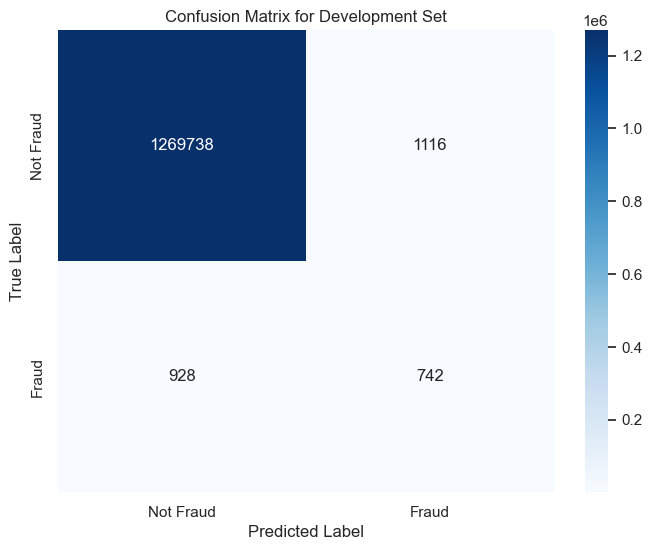

In [135]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix for Development Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**AUC for ROC and PR**

In [136]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

In [137]:
# Predict probabilities for the development set
y_dev_proba = model.predict_proba(X_dev)[:, 1] # Probability of 'Fraud'

Calculate ROC Curve and ROC AUC

In [138]:
# Compute ROC curve points and ROC AUC
fpr, tpr, _ = roc_curve(y_dev, y_dev_proba)
roc_auc = roc_auc_score(y_dev, y_dev_proba)

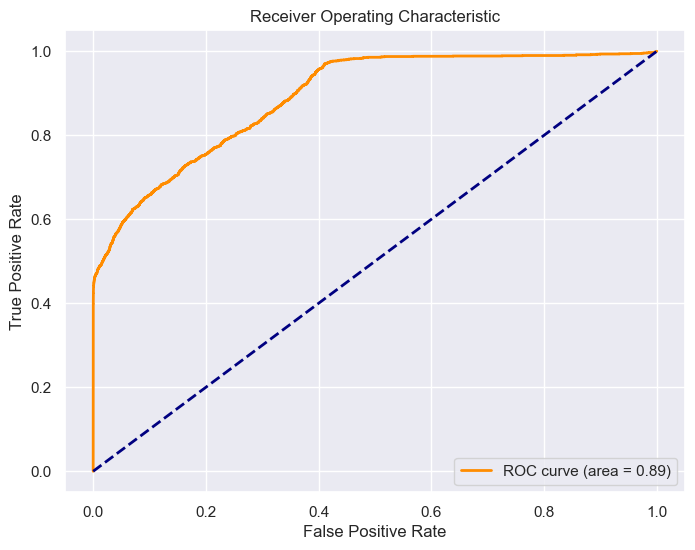

In [139]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Calculate PR Curve and PR AUC

In [140]:
# Compute precision-recall curve points
precision, recall, _ = precision_recall_curve(y_dev, y_dev_proba)
pr_auc = auc(recall, precision)

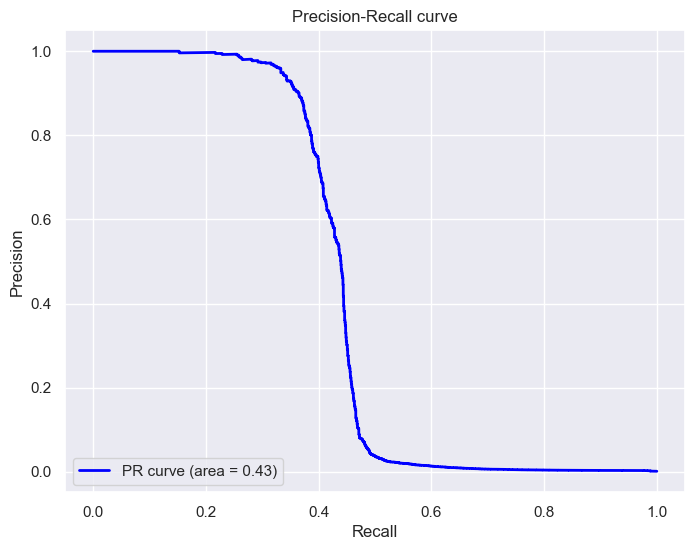

In [141]:
# Plot PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

ROC Curve: This curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The AUC for the ROC curve gives you an aggregate measure of performance across all possible classification thresholds. Generally, an AUC closer to 1 indicates a better model.

Precision-Recall (PR) Curve: This curve is a plot of precision (positive predictive value) against recall (sensitivity) for different thresholds. Like the ROC curve, a higher area under the PR curve indicates a better model. PR curves are particularly useful when the classes are imbalanced.
